# Exercise 1
Consider the following dataset
```
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()
imgs = olivetti.images
labels = olivetti.target
X = imgs.reshape((400, 4096)).transpose()
```
1. Visualize 10 randomly selected pictures with the corresponding labels.
2. Compute and visualize the average of the images.
3. Perform SVD by first setting the attribute full_matrices = True and then full_matrices = False.
Comment the results.
4. Plot the trend of the singular values and the fraction of "explained variance".
5. Implement a function computing the randomized SVD of rank k for a generic matrix.
6. Set k = 1, 5, 10, 50, 100 and plot the approximated singular values together with the exact ones.
7. Use PCA to perform dimensionality reduction on the dataset of images for rank k = 1, 5, 10, 50, 100 by
means of exact SVD. Compute the reconstruction error and plot it as a function of k . Comment the
results.
8. Visualize the first 30 principal axes.
9. Compute the first two principal components related to the subset of images corresponding to labels = 0, 39.
10. Create a scatterplot for the first 2 principal components of the subset of images grouped by label. Comment
what you see.

In [1]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()
imgs = olivetti.images
labels = olivetti.target
X = imgs.reshape((400, 4096)).transpose()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/ceru/scikit_learn_data


1. Visualize 10 randomly selected pictures with the corresponding labels.

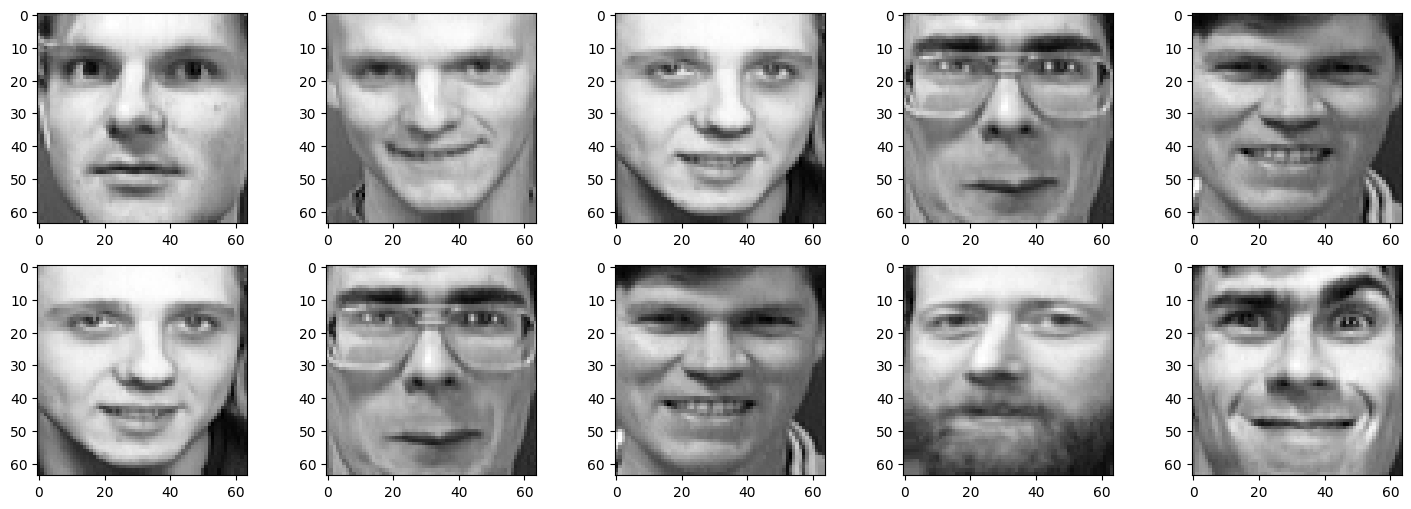

In [2]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
indexes = np.random.choice(400, 10)
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(18,6))
plt.set_cmap('grey')
for i in range(2):
    for j in range(5):
        axs[i][j].imshow(X[:,indexes[2*i+j]].reshape((64,64)))
plt.show()

2. Compute and visualize the average of the images.

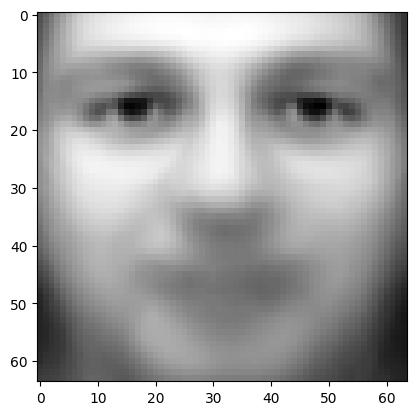

In [3]:
X_average = X.mean(axis=1)

plt.imshow(X_average.reshape((64,64)))
plt.set_cmap('grey')
plt.show()

3. Perform SVD by first setting the attribute full_matrices = True and then full_matrices = False.
Comment the results.

In [4]:
import time

t0 = time.time()
U_full, s_full, VT_full = np.linalg.svd(X, full_matrices=True)
print("computational time:", time.time()-t0)
print('function shapes:')
print('U: ', U_full.shape)
print('s: ', s_full.shape)
print('VT: ', VT_full.shape)

computational time: 7.382140874862671
function shapes:
U:  (4096, 4096)
s:  (400,)
VT:  (400, 400)


In [5]:
t0 = time.time()
U, s, VT = np.linalg.svd(X, full_matrices=False)
print("computational time:", time.time()-t0)
print('function shapes:')
print('U: ', U.shape)
print('s: ', s.shape)
print('VT: ', VT.shape)

computational time: 0.6275033950805664
function shapes:
U:  (4096, 400)
s:  (400,)
VT:  (400, 400)


Comment the results.
> By using full matrices we compute the complete version of the SVD where we obtain also the left singular vector because we fully compute U.
> On the other and by computing the truncated SVD we still able to reconstruct exactly the initial matrix but we:
> - Save up some space by representing only the part of U necessary to the reconstruction of X
> - Save some computational time due to the fact that not the whole U is computed

> Is important to highlight that both the version of the SVD present an exact factorization of X. This is because a subsection of U would be multiplied by the null vector meanwhile all component of U that are multiplied by the singular values are computed both cases.
> Note that in this case the truncation happens to be on U because X.shape(n,p) where p>n. If n>p we would have a truncation on VT

4. Plot the trend of the singular values and the fraction of "explained variance".

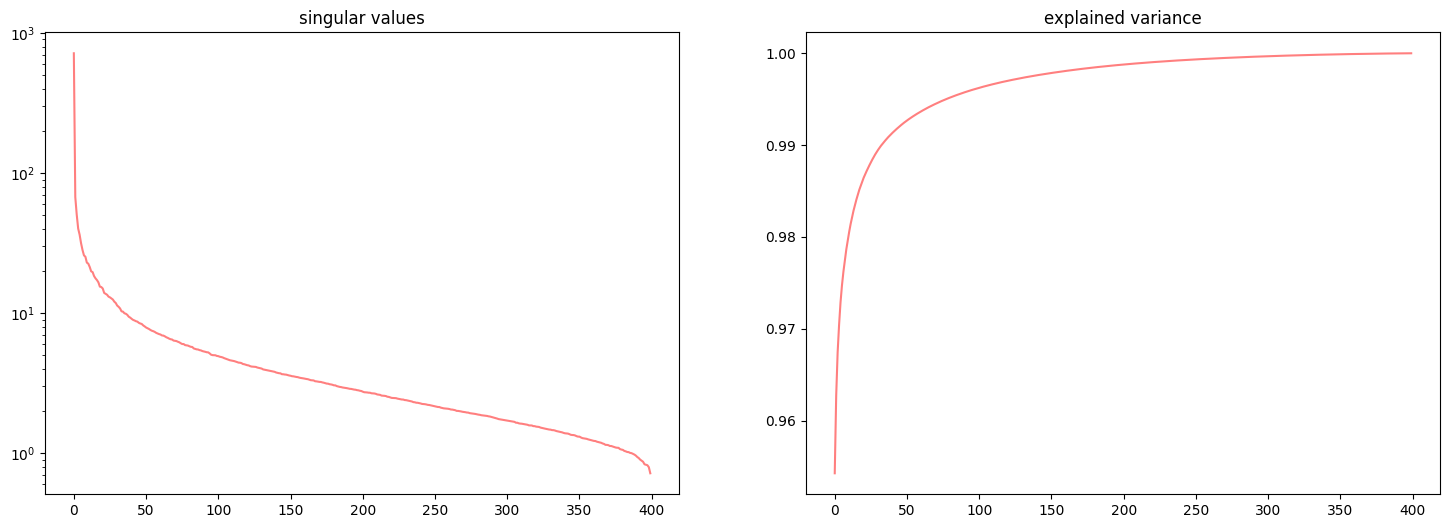

In [6]:
from tqdm.notebook import tqdm

k = np.arange(len(s))
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

axes[0].semilogy(k, s, color='red', alpha=0.5)
axes[0].set_title(f'singular values')

axes[1].plot(k, np.cumsum(s**2)/np.sum(s**2), color='red', alpha=0.5)
axes[1].set_title(f'explained variance')
plt.show()

5. Implement a function computing the randomized SVD of rank k for a generic matrix.

In [7]:
def randomized_SVD(A, k):
  n, m = A.shape[0], A.shape[1]
  P = np.random.randn(m, k)
  Z = A @ P
  Q, R = np.linalg.qr(Z)
  Y = Q.T @ A
  U_Y, s, VT = np.linalg.svd(Y, full_matrices = False)
  U = Q @ U_Y
  return U, s, VT

6. Set k = 1, 5, 10, 50, 100 and plot the approximated singular values together with the exact ones.

  0%|          | 0/5 [00:00<?, ?it/s]

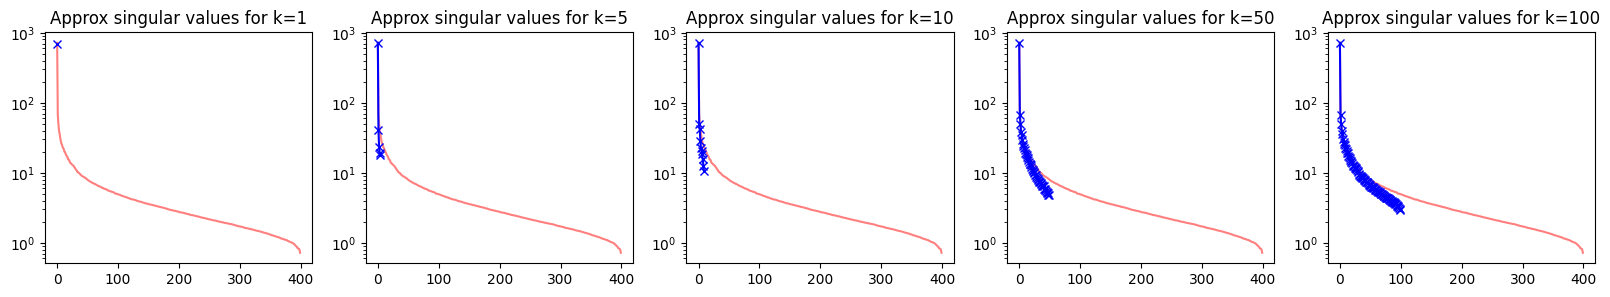

In [8]:
k = [1, 5, 10, 50, 100]
fig, axes = plt.subplots(nrows = 1, ncols = len(k), figsize = (20, 3))

for i in tqdm(range(len(k))):
    U_approx, s_approx, VT_approx = randomized_SVD(X, k[i])
    axes[i].semilogy(s, color='red', alpha=0.5)
    axes[i].semilogy(s_approx, 'x-', color='blue')
    axes[i].set_title(f'Approx singular values for k={k[i]}')


7. Use PCA to perform dimensionality reduction on the dataset of images for rank k = 1, 5, 10, 50, 100 by
means of exact SVD. Compute the reconstruction error and plot it as a function of k . Comment the
results.

In [9]:
k = [1, 5, 10, 50, 100]
dim = X.shape[0]*X.shape[1]

X_centered = X-X_average[:,None]
U, s, VT = np.linalg.svd(X_centered)

  0%|          | 0/5 [00:00<?, ?it/s]

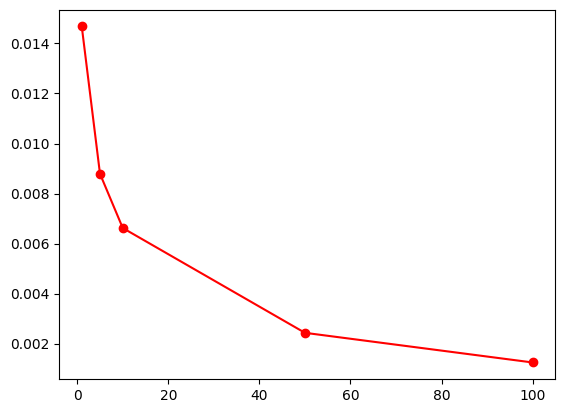

In [10]:
errors = list()

for i in tqdm(range(len(k))):
    r = U[:,:min(len(U),k[i])] @ np.diag(s[:min(len(U),k[i])]) @ VT[:min(k[i],len(U)),:]
    errors.append((np.linalg.norm(X_centered - r, 'fro')**2)/dim)


plt.plot(k, errors, 'o-', color='red')

plt.show()

Comment the results.
> By increasing k we are considering the reconstruction became more precise so the reconstruction error decreases. It may be worth highlight the fact that the reconstruction error is already low when k=1, meaning that the majority of the variance lays on the first pricipal component

8. Visualize the first 30 principal axes.

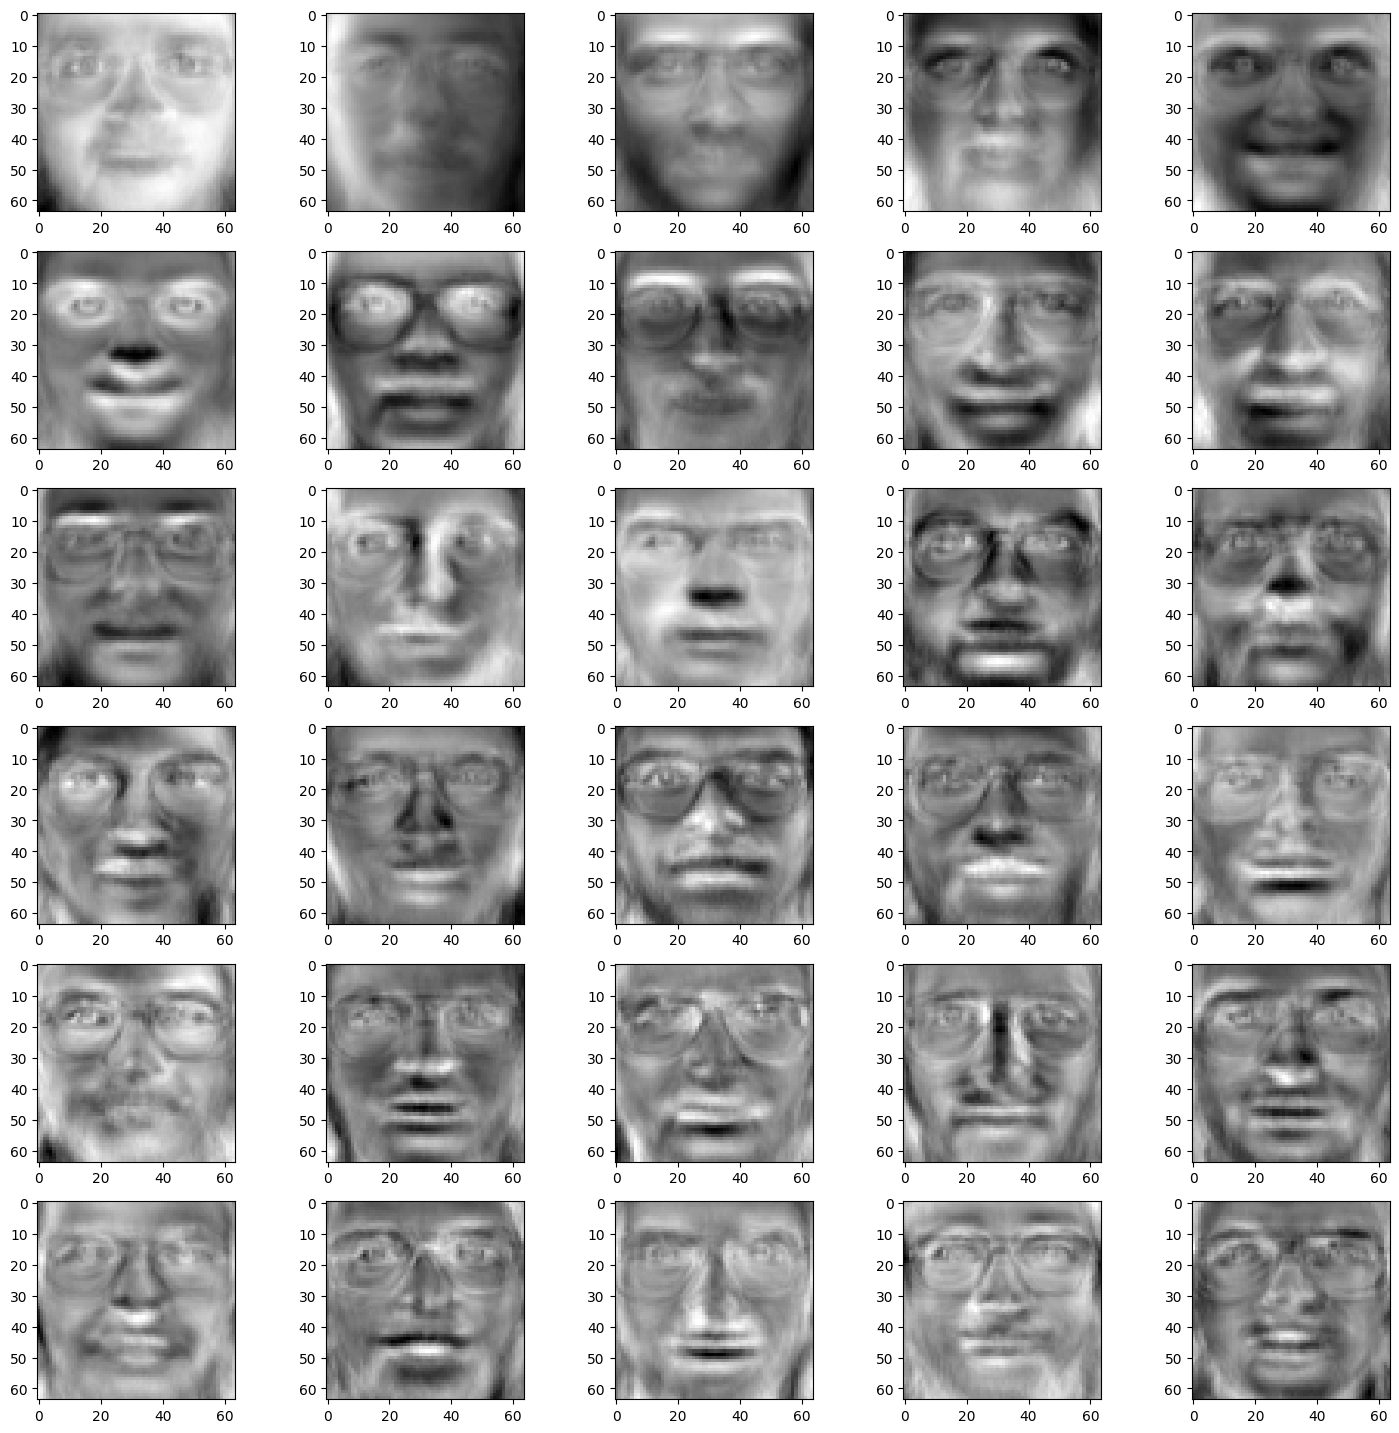

In [11]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(18,18))
for i in range(6):
    for j in range(5):
        axs[i][j].imshow(U[:,5*i+j].reshape((64,64)))
plt.set_cmap('grey')
plt.show()

9. Compute the first two principal components related to the subset of images corresponding to labels = 0, 39.

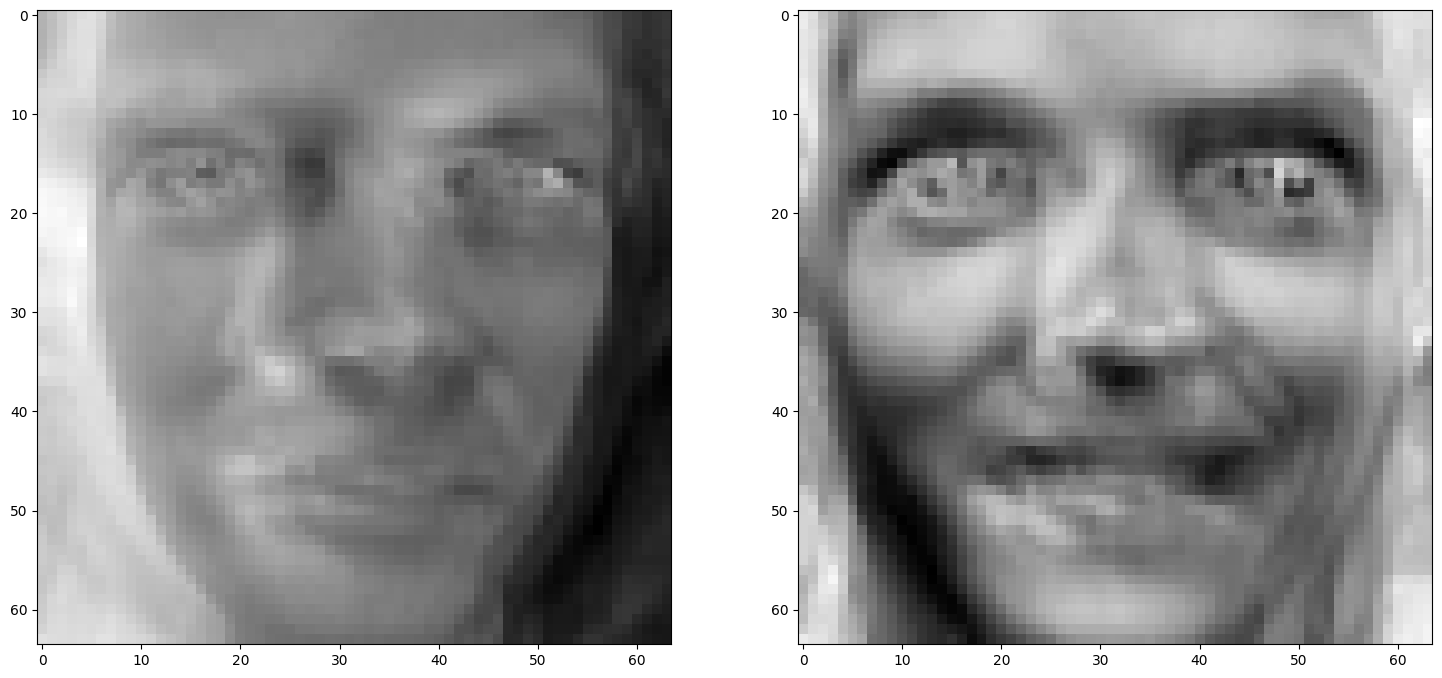

In [ ]:
zero_labelled = np.where(labels==0)[0]
thirtynine_labelled = np.where(labels==39)[0]
selected = np.union1d(zero_labelled, thirtynine_labelled)

X_sub = np.array([X[:,i] for i in selected]).T
X_sub_centered = X_sub - X_sub.mean(axis=1)[:,None]

U_sub, s_sub, VT_sub = np.linalg.svd(X_sub_centered)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
for i in range(2):
    axs[i].imshow(U_sub[:,i].reshape((64,64)))
plt.show()

10. Create a scatterplot for the first 2 principal components of the subset of images grouped by label. Comment
what you see.

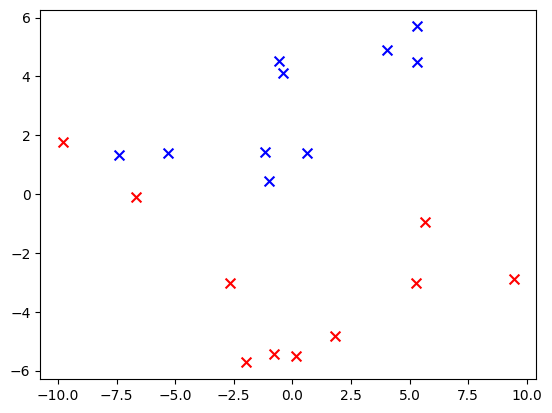

In [ ]:
fig = plt.figure()

for i in range (X_sub_centered.shape[1]):
    x = X_sub_centered[:,i].T @ U_sub[:,0]
    y = X_sub_centered[:,i].T @ U_sub[:,1]
    if i < len(zero_labelled):
        col = 'r'
    else:
        col = 'b'
    plt.scatter(x,y, marker='x', s=50,color=col)
plt.show()

#### Comment:
> The scatterplot shows that the first two principal components are able to separate the two classes of images. In particular the two classes are well separated along the second principal component.

## Exercise 2

Consider the Ridge regression.
1. Write the loss function for the Ridge regression.
2. Derive the expression of the solution w∗ (weight vector) for the Ridge regression.
3. Consider the dataset
```
np.random.seed(55)
x = np.arange(np.pi,3*np.pi,0.1)
y = np.sin(x) + np.random.normal(0,0.1,len(x))
```
and the following values of λ (regularization parameter) λ = 0, 10−32 , 10−16 , 10−8 , 10−2 , 1, 16, 32, 1024.
Compute the values of w∗ and plot the solution of the Ridge regression for the above mentioned values
of λ. Comment the obtained results.

1. Write the loss function for the Ridge regression.

$$ L(w) = ||y-Xw||^2 + \lambda ||w||^2 $$

In [17]:
import jax.numpy as jnp

def ridge_loss(X, W, b, y, l):
    y_pred = jnp.dot(W, X) + b
    return jnp.norm(y - y_pred)**2 + l * jnp.norm(W)**2


2. Derive the expression of the solution w∗ (weight vector) for the Ridge regression.


The goal is to select $w^*$ such that the ridge regression loss is minimized (where $y\_pred = Xw$)

\begin{equation}
w^* = arg\min_w{||y-y\_pred||^2 + \lambda ||w||^2}
\end{equation}

The function to minimize is the following quadratic function

\begin{equation}
f(w) = y^Ty-2y\_pred^Ty + y\_pred^2 + \lambda w^T*w
\end{equation}

\begin{equation}
f(w) = y^Ty-2(Xw)^Ty + (Xw+b)^2 + \lambda w*w^T
\end{equation}

Given that the function is always convex (can be checked computing the hessian) and quadratic we have the minima when the derivative with respect to w reaches 0

\begin{equation}
\frac{\partial{f}}{\partial{w}} = -2(X)^Ty + 2X^TXw+ \lambda 2w
\end{equation}

\begin{equation}
-2(X)^Ty + 2X^TXw^*+ \lambda 2w^* = 0
\end{equation}

So w^* is the w that satisfies the previous equation. In particular can be calculated as:

\begin{equation}
w^* = (X^TX + \lambda I)^{-1}X^Ty
\end{equation}

3. Consider the dataset
```
np.random.seed(55)
x = np.arange(np.pi,3*np.pi,0.1)
y = np.sin(x) + np.random.normal(0,0.1,len(x))
```
and the following values of λ (regularization parameter) λ = 0, 10−32 , 10−16 , 10−8 , 10−2 , 1, 16, 32, 1024.
Compute the values of w∗ and plot the solution of the Ridge regression for the above mentioned values
of λ. Comment the obtained results.

In [15]:
np.random.seed(55)
x = np.arange(np.pi,3*np.pi,0.1)
y = np.sin(x) + np.random.normal(0,0.1,len(x))

lambdas = [0, 1e-32, 1e-16, 1e-8, 1e-2, 1, 16, 32, 1024]

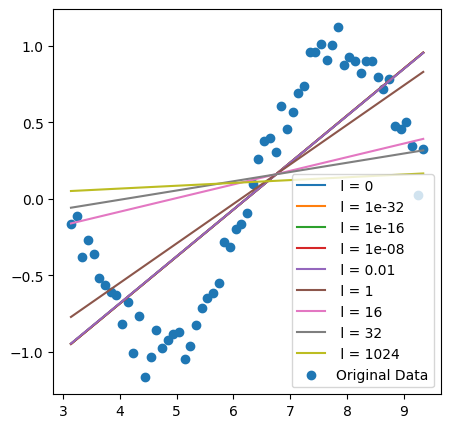

In [16]:
plt.figure(figsize=(5, 5))
X = np.column_stack((np.ones_like(x),x))

def reg(X, y, l):
    return np.linalg.inv(X.T@X + l*np.identity(X.shape[1]))@X.T@y

for l in lambdas:
    w_star = reg(X, y, l)
    y_pred = X @ w_star
    plt.plot(x, y_pred, label=f' l = {l}')

plt.scatter(x, y, label='Original Data')
plt.legend()
plt.show()

Comment the obtained results.
> When lambda is very small the result is not widely affected and from the image for all lambda such that 0<=lambda<=0.01 the results are almost the same. In particular we remember that when lambda=0 implies that ridge regression is equivalent to classica least square regression.
> 
> When the value increase we should avoid overfitting the data, however when lambda becames too big the result for w tends to the null vector and so the regression tends to the mean of the dataset.
> 
> Probably a good value for w would be around 1 where we could have a tradeoff between the two tendencies (overfitting - tendency to zero vector)

## Exercise 3
Consider the quadratic function
$$
J(x) = \frac{1}{2} x^TAx - b^T x
$$ 

where $$A ∈ R^{n×n} $$ is SPD and $b ∈ R^n$ .
1. Compute the gradient and the Hessian of J.
> $$ ∇J(x) = Ax - b^T $$
> $$ H(J(x)) = A $$

2. Verify that J is strictly convex and find the unique global minimum of J.
> Given that A is spd then also the Hessian is spd. This implies that:
> $$ \frac{\partial{J(x)}}{\partial{x_i}^2} > 0 $$
> So the second derivative is positive in all direction and implying convexity of the function
> To get the minima we can look for the only points in which the gradient is null.
> Given convexity all the points where  $$ ∇J(x) = 0 $$ are local minima, meanwhile strict convexity also assures us that this point is unique so it will be a global minima.
> 
>  $$ ∇J(x) = 0 $$
> 
>  $$ Ax - b^T = 0 $$
> 
>  $$ Ax = b^T $$
> 
>  $$ x_{min} = A^{-1}b^T $$
> 
> Note that A is psd so it is invertible

3. Let $x ∈ R^n$ and $q ∈ R^n$ a direction s.t. $∇J(x)T q < 0$. Compute analytically the step length α that solve the following exact line-search problem: $\min_{α>0} J(x + αq)$

> We can calculate the derivative of J in function of alpha
>
> $$ J(x) = \frac{1}{2} (x+\alpha q)^TA(x+\alpha q) - b^T (x + \alpha q) =\frac{1}{2}​x^TAx+αq^TAx+\frac{1}{2}​α^2q^TAq−b^Tx−αb^Tq$$
> 
> $$ \frac{\partial{J(x)}}{\partial{\alpha}} = q^TAx + αq^TAq − b^Tq $$
> 
> By solving $ \frac{\partial{J(x)}}{\partial{\alpha}} = 0 $ we get the optimal alpha
>
>  $$ αq^TAq = −q^TAx + b^Tq $$
> 
> $$ \alpha =(q^TAq)^{-1}(−q^TAx + b^Tq) $$
>
> This is the value of αα that minimizes J(x+αq)J(x+αq), assuming that qTAq>0qTAq>0 (which is true as AA is positive definite).